# Small Gridworld Example

Demonstrative example to illustrate policy evaluation with dynamic programming.

Iteration based on Bellman Expectation Equation:

\begin{equation}
    v_{k+1}(s)
    =
    \sum_{a \in \mathcal{A}}
    \pi(a|s)
    \left(
        \mathcal{R}_{s}^{a}
        +
        \gamma
        \sum_{s' \in S}
        P^{a}_{ss'}
        v_{k}(s')
    \right)
\end{equation}

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from rl_model import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Main

In [67]:
value_function = np.zeros(shape=(4,4))

## Test area

In [68]:
agent_initial_position = (1,1)

In [69]:
E = Environment(agent_initial_position)

In [70]:
A = Agent(environment=E, initial_pos=agent_initial_position, policy=random_policy)

In [71]:
A.get_current_state()

(1, 1)

In [72]:
A.make_nsteps(3)

Action: 1
Action: 0
Action: 2


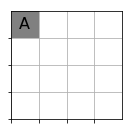

In [93]:
A.act([0], doPlot=True)

In [73]:
A.get_current_state()

(1, 0)

(<Figure size 216x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a165a1940>)

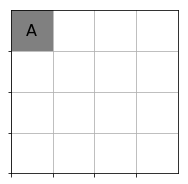

In [97]:
E.plot()

In [96]:
E.agent_state

(0, 3)

In [12]:
value_function

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])